In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, cmath

In [2]:
# Function to calculate the change in phase
def f(omega_i, K, N, theta_i, phases):
    # Apply lambda function to every neuron
    vf = np.vectorize(lambda theta_i, x: math.sin(theta_i - x))
    return omega_i * K / N * np.sum(vf(theta_i, phases))

# Function to calculate the Mean Field Equation
def MFE(N, phases):
    # Same trick here: apply a lambda function to every oscillator
    vf = np.vectorize(lambda x: math.cos(x) + complex(0, math.sin(x)))
    return np.sum(vf(phases)) / N

In [3]:
def solution(K, timesteps, n, dt):
    # Define constants
    N = 1000  # Number of oscillators
    
    # Initialize constructs
    phases = np.zeros(N)
    phases[0:int(N/2)].fill(1 / 4 * math.pi)
    rs, thetas = np.empty(len(timesteps)), np.empty(len(timesteps))
    
    # Draw omegas from a normal distribution
    omega = np.random.normal(0, 0.1, N)
    
    # Run simulation
    for j in range(len(timesteps)):
        for i in range(N):
            
            # Determine change in theta per timestep
            dtheta = f(omega[i], K, N, phases[i], phases)
            
            # Update oscillator phase
            phases[i] = phases[i] + dtheta * dt
        
        # Apply Mean Field Equation to get the vector in complex field
        vector = MFE(N, phases)
        rs[j] = abs(vector)
        thetas[j] = cmath.phase(vector)
        
    return rs, thetas, phases

In [4]:
def plot(timesteps, rs, thetas):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("r over time for K = {}".format(K))
    plt.tight_layout()
    plt.plot(timesteps, rs)
    plt.subplot(1, 2, 2)
    plt.title("Theta over time for K = {}".format(K))
    plt.tight_layout()
    plt.plot(timesteps, thetas)
    plt.show()

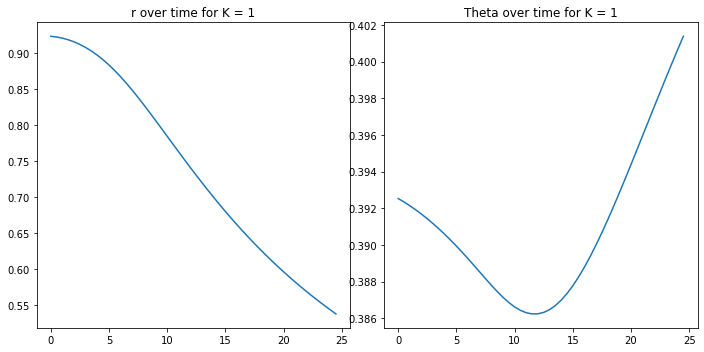

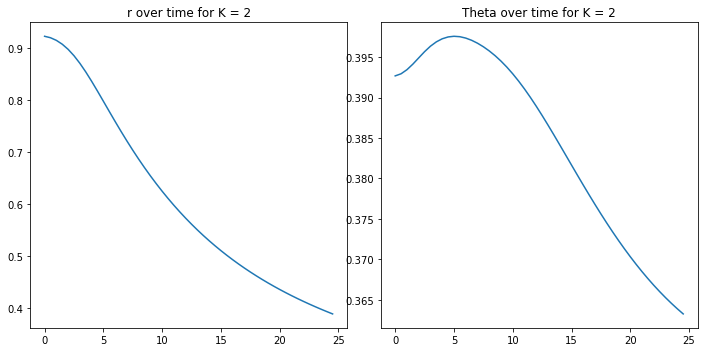

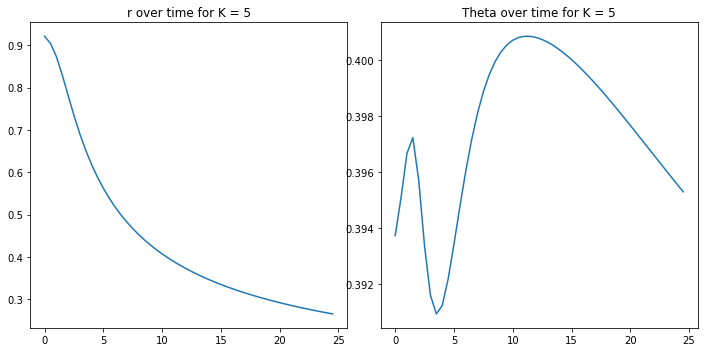

In [5]:
# Define constants outside of function, 
# to re-use them for plotting
K = 1
dt = 0.5
n = 25  # total simulation time
timesteps = np.arange(0, n / dt) * dt

# Get MFE vectors over time for different values of K
# TODO: loop over a few K's
for K in [1, 2, 5]:
    rs, thetas, phases = solution(K, timesteps, n, dt)
    plot(timesteps, rs, thetas)

In [7]:
# Things to think about:

# What to do with the mean field equations?
# Initial values for the oscillators?
# Value range for K?
# (i in the formula's is not the index but the square root of -1 right?)